# Four-Year Graduation Rates in Iowa by Cohort and Public School District

#### Name: Venkata Ramya Bandaru
#### Student Id: x22151699
#### Email Id: x22151699@student.ncirl.ie

## 1. Installing and Importing Packages

In [ ]:
!pip install pymongo

In [2]:
import pymongo
from pymongo import MongoClient
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')

## 2. Connection Information

### 2.1. Credentials and URL for API Endpoint

In [3]:
API_KEY = '2eppuq4ed0e9t3irfr4hhmcmn'
API_SECRET = '2gyy0s1qhbfl7gq5z9l4g5xkx74ztiyu5dxjohe5jvhszysev9'
URL = 'https://data.iowa.gov/resource/tqti-3w6t.json?$limit=5000&$offset=0'

### 2.2. NCI Open Stack Private Cloud Instance IP

In [4]:
HOST = '87.44.4.25'

### 2.3. Mongo Database Connection Credentials and Port


In [5]:
DATABASE_NAME = 'iowa_state_education_db'
USER_NAME = 'DAP_PROJ_USER'
USER_PASSWORD = 'DAP_PROJ_25'
PORT = 27017

## 3. Function to fetch the Semistructured Iowa State 4 Year Graducation Rate Data Using API Key and Secret

In [6]:
headers = {
    'X-Api-Key': API_KEY,
    'X-Api-Secret': API_SECRET
}

response = requests.get(URL, headers=headers)
iowa_graduation_rate_data = {}
if response.status_code == 200:
    iowa_graduation_rate_data = response.json()
else:
    print('Request failed with status code: ', response.status_code)

## 4. Store JSON based Iowa State 4 Year Graducation Rate Data to Mongo DB which is hosted in NCI Private Cloud Ubuntu Machine

In [7]:
client = MongoClient(f'mongodb://{USER_NAME}:{USER_PASSWORD}@{HOST}:{PORT}/{DATABASE_NAME}')
db = client[DATABASE_NAME]
iowa_graduation_rate_collection = db['iowa_graduation_rate']
iowa_graduation_rate_collection.drop()
result = iowa_graduation_rate_collection.insert_many(iowa_graduation_rate_data)
client.close()

## 5. Fetch Iowa State 4 Year Graducation Rate Data from Mongo DB which is hosted in NCI Private Cloud Ubuntu Machine

In [8]:
client = MongoClient(f'mongodb://{USER_NAME}:{USER_PASSWORD}@{HOST}:{PORT}/{DATABASE_NAME}')
db = client[DATABASE_NAME]
iowa_graduation_rate_collection = db['iowa_graduation_rate']
iowa_graduation_rate_documents = iowa_graduation_rate_collection.find()
iowa_graduation_rate_df = pd.DataFrame(list(iowa_graduation_rate_documents))

In [9]:
backup_df = iowa_graduation_rate_df

In [10]:
iowa_graduation_rate_df = backup_df

## 6. Exploratory Data Analysis

In [11]:
iowa_graduation_rate_df.head()

,_id,graduating_class,fall_freshman_year,district,district_name,graduates,total_cohort,graduation_rate,graduation_rate_category
0,644589043910e7da362917cf,2016,2012,0009,AGWSR,35,35,100,90.1 - 100%
1,644589043910e7da362917d0,2015,2011,0009,AGWSR,44,45,97.8,90.1 - 100%
2,644589043910e7da362917d1,2014,2010,0009,AGWSR,46,46,100,90.1 - 100%
3,644589043910e7da362917d2,2017,2013,0009,AGWSR,36,39,92.3,90.1 - 100%
4,644589043910e7da362917d3,2009,2005,0009,AGWSR,42,46,91.3,90.1 - 100%


In [12]:
iowa_graduation_rate_df.columns

Index(['_id', 'graduating_class', 'fall_freshman_year', 'district',
       'district_name', 'graduates', 'total_cohort', 'graduation_rate',
       'graduation_rate_category'],
      dtype='object')

In [13]:
iowa_graduation_rate_df.shape

(3566, 9)

In [14]:
iowa_graduation_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   _id                       3566 non-null   object
 1   graduating_class          3566 non-null   object
 2   fall_freshman_year        3566 non-null   object
 3   district                  3566 non-null   object
 4   district_name             3566 non-null   object
 5   graduates                 3458 non-null   object
 6   total_cohort              3458 non-null   object
 7   graduation_rate           3458 non-null   object
 8   graduation_rate_category  3566 non-null   object
dtypes: object(9)
memory usage: 250.9+ KB


In [15]:
iowa_graduation_rate_df.describe().T

,count,unique,top,freq
_id,3566,3566,644589043910e7da362917cf,1
graduating_class,3566,11,2016,333
fall_freshman_year,3566,11,2012,333
district,3566,348,0009,11
district_name,3566,378,AGWSR,11
graduates,3458,426,40,68
total_cohort,3458,448,45,57
graduation_rate,3458,515,100,415
graduation_rate_category,3566,7,90.1 - 100%,2592


In [16]:
iowa_graduation_rate_df.isnull().sum()

_id                           0
graduating_class              0
fall_freshman_year            0
district                      0
district_name                 0
graduates                   108
total_cohort                108
graduation_rate             108
graduation_rate_category      0
dtype: int64

In [17]:
iowa_graduation_rate_df.isna().mean() * 100


_id                         0.000000
graduating_class            0.000000
fall_freshman_year          0.000000
district                    0.000000
district_name               0.000000
graduates                   3.028603
total_cohort                3.028603
graduation_rate             3.028603
graduation_rate_category    0.000000
dtype: float64

## 7. Missing Values Analysing and Cleaning

### 7.1. Analysing _id column

In [18]:
iowa_graduation_rate_df['_id'].isnull().sum()

0

In [19]:
iowa_graduation_rate_df['_id'].value_counts()

644589043910e7da362917cf    1
644589043910e7da3629211c    1
644589043910e7da36292111    1
644589043910e7da36292112    1
644589043910e7da36292113    1
                           ..
644589043910e7da36291c77    1
644589043910e7da36291c78    1
644589043910e7da36291c79    1
644589043910e7da36291c7a    1
644589043910e7da362925bc    1
Name: _id, Length: 3566, dtype: int64

In [20]:
# Just a random generated id we can discard this
iowa_graduation_rate_df = iowa_graduation_rate_df.drop(['_id'], axis = 1)

### 7.2. Analysing graduating_class column
	
Year the class is expected to graduate

In [21]:
iowa_graduation_rate_df['graduating_class'].isnull().sum()

0

In [22]:
iowa_graduation_rate_df['graduating_class'].value_counts()

2016    333
2017    333
2009    333
2010    333
2011    331
2018    324
2012    322
2013    322
2015    320
2014    312
2019    303
Name: graduating_class, dtype: int64

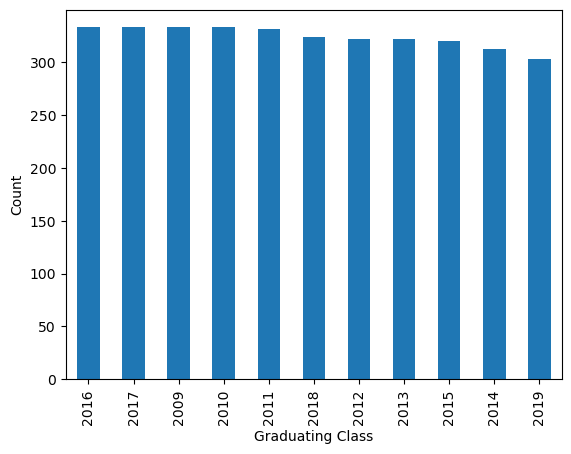

In [23]:
import matplotlib.pyplot as plt

ax = iowa_graduation_rate_df['graduating_class'].value_counts().plot(kind='bar')
ax.set_xlabel("Graduating Class")
ax.set_ylabel("Count")
plt.show()


### 7.3. Analysing fall_freshman_year column
The year the cohort entered their freshman year of high school


In [24]:
iowa_graduation_rate_df['fall_freshman_year'].isnull().sum()

0

In [25]:
iowa_graduation_rate_df['fall_freshman_year'].value_counts()

2012    333
2013    333
2005    333
2006    333
2007    331
2014    324
2008    322
2009    322
2011    320
2010    312
2015    303
Name: fall_freshman_year, dtype: int64

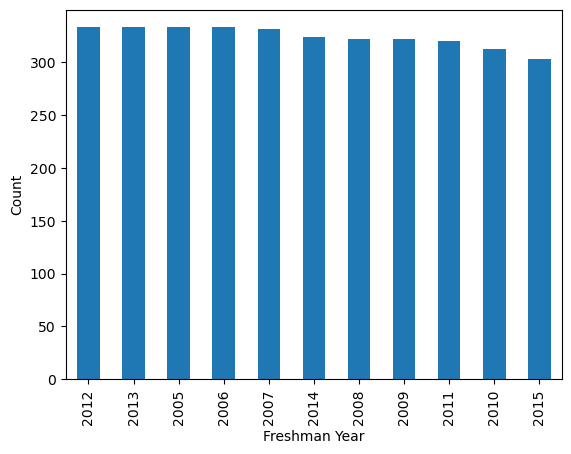

In [26]:
import matplotlib.pyplot as plt

ax = iowa_graduation_rate_df['fall_freshman_year'].value_counts().plot(kind='bar')
ax.set_xlabel("Freshman Year")
ax.set_ylabel("Count")
plt.show()


### 7.4. Analysing district column
ID given by the Department of Education for the school district

In [27]:
iowa_graduation_rate_df['district'].isnull().sum()

0

In [28]:
iowa_graduation_rate_df['district'].value_counts()

0009    11
3312    11
4788    11
4785    11
4784    11
        ..
2493     2
5301     2
1675     2
0603     2
5328     1
Name: district, Length: 348, dtype: int64

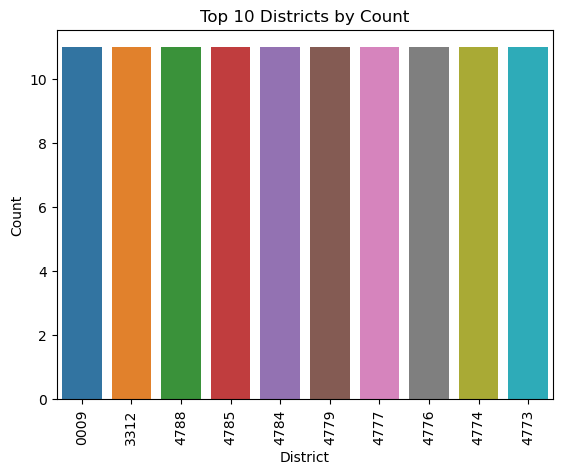

In [29]:
import seaborn as sns

top_n = 10
top_districts = iowa_graduation_rate_df['district'].value_counts().head(top_n).index.tolist()
sns.countplot(x='district', data=iowa_graduation_rate_df, order=top_districts)
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Count')
plt.title(f'Top {top_n} Districts by Count')
plt.show()


### 7.5. Analysing district_name column
Name of the school district. Name of a school district associated with a district number may change over time due to school consolidations.


In [30]:
iowa_graduation_rate_df['district_name'].isnull().sum()

0

In [31]:
iowa_graduation_rate_df['district_name'].value_counts()

AGWSR                    11
Howard-Winneshiek        11
Northeast                11
Newton                   11
New London               11
                         ..
Delwood                   2
Decorah Community         2
Eddyville-Blakesburg-     2
Van Buren County          1
Prescott                  1
Name: district_name, Length: 378, dtype: int64

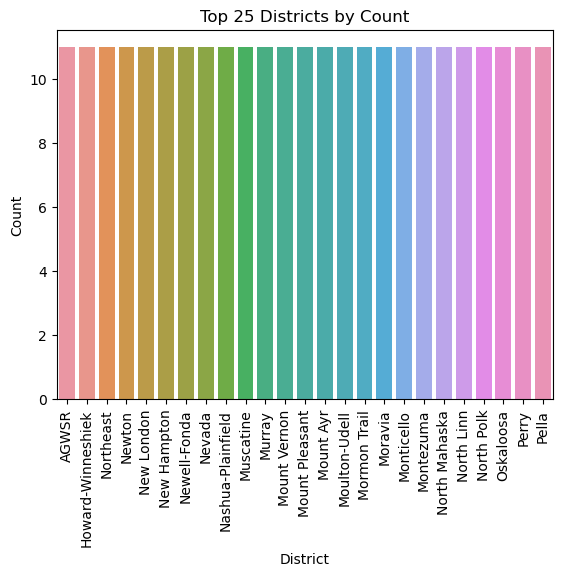

In [32]:
import seaborn as sns

top_n = 25
top_districts = iowa_graduation_rate_df['district_name'].value_counts().head(top_n).index.tolist()
sns.countplot(x='district_name', data=iowa_graduation_rate_df, order=top_districts)
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Count')
plt.title(f'Top {top_n} Districts by Count')
plt.show()


### 7.6. Analysing graduates column
First time freshman in year indicated in fall freshman year and transfers into the cohort in grades 9 to 12 who graduated in year indicated in graduating class or earlier. SCS (small cell size) indicates data was redacted to ensure privacy standards where met.

In [33]:
iowa_graduation_rate_df['graduates'] = pd.to_numeric(iowa_graduation_rate_df['graduates'], errors='coerce')


In [34]:
iowa_graduation_rate_df['graduates'].isnull().sum()

108

In [35]:
iowa_graduation_rate_df['graduates'].value_counts()

40.0     68
44.0     59
33.0     57
42.0     57
53.0     57
         ..
743.0     1
710.0     1
674.0     1
723.0     1
266.0     1
Name: graduates, Length: 426, dtype: int64

<AxesSubplot:xlabel='graduates', ylabel='Count'>

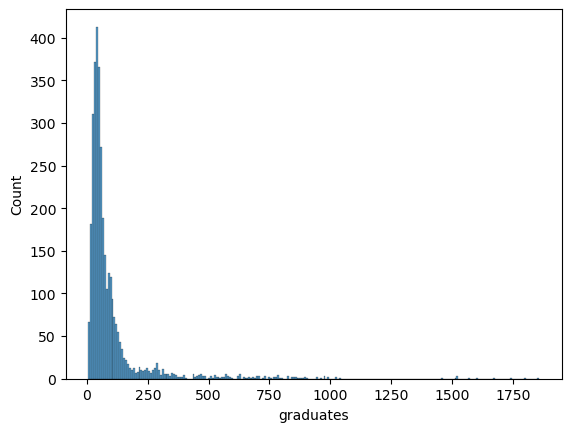

In [36]:
import seaborn as sns

sns.histplot(data=iowa_graduation_rate_df, x='graduates')


In [37]:
median_value = iowa_graduation_rate_df['graduates'].median()
iowa_graduation_rate_df['graduates'] = iowa_graduation_rate_df['graduates'].fillna(median_value)


In [38]:
iowa_graduation_rate_df['graduates'].isnull().sum()

0

### 7.7. Analysing total_cohort column

In [39]:
iowa_graduation_rate_df['total_cohort'] = pd.to_numeric(iowa_graduation_rate_df['total_cohort'], errors='coerce')

In [40]:
iowa_graduation_rate_df['total_cohort'].isnull().sum()

108

In [41]:
iowa_graduation_rate_df['total_cohort'].value_counts()

45.0     57
44.0     55
30.0     54
46.0     53
39.0     53
         ..
793.0     1
895.0     1
932.0     1
773.0     1
287.0     1
Name: total_cohort, Length: 448, dtype: int64

<AxesSubplot:xlabel='total_cohort', ylabel='Count'>

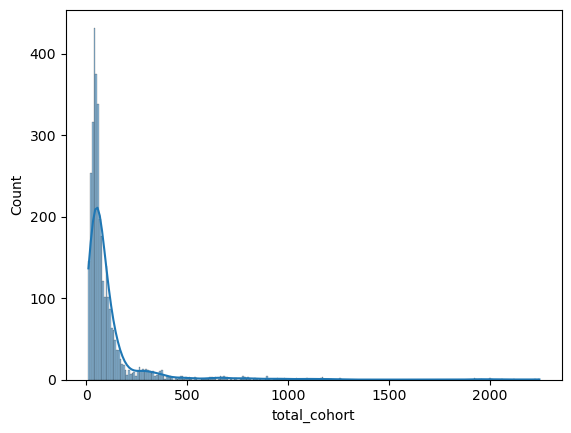

In [42]:
import seaborn as sns

sns.histplot(data=iowa_graduation_rate_df, x='total_cohort', kde=True)


In [43]:
# The data appears to have a wide range of values, with a few high values and many low values. In this case, it might be more appropriate to use median imputation for missing values in the total_cohort variable, rather than mean imputation. The reason for this is that the median is less sensitive to extreme values than the mean, so it is less likely to be affected by the few high values in the data.
median_total_cohort = iowa_graduation_rate_df['total_cohort'].median()
iowa_graduation_rate_df['total_cohort'].fillna(median_total_cohort, inplace=True)


In [44]:
iowa_graduation_rate_df['total_cohort'].isnull().sum()

0

### 7.8. Analysing graduation_rate column
Graduates divided by Total Cohort multiplied by 100. SCS (small cell size) indicates data was redacted to ensure privacy standards where met.

In [45]:
iowa_graduation_rate_df['graduation_rate'].isnull().sum()

108

In [46]:
iowa_graduation_rate_df['graduation_rate'].value_counts()

100      415
97.1      43
95.7      40
96.4      39
98        38
        ... 
82.65      1
81.48      1
98.57      1
69.6       1
97.83      1
Name: graduation_rate, Length: 515, dtype: int64

In [47]:
mask = iowa_graduation_rate_df['graduation_rate'].isnull()

graduation_rate = iowa_graduation_rate_df['graduates'] / iowa_graduation_rate_df['total_cohort'] * 100
graduation_rate[mask] = graduation_rate[mask].round(2)

iowa_graduation_rate_df['graduation_rate'].fillna(graduation_rate, inplace=True)


In [48]:
iowa_graduation_rate_df['graduation_rate'].isnull().sum()

0

### 7.9. Analysing graduation_rate_category column

In [49]:
iowa_graduation_rate_df['graduation_rate_category'].isnull().sum()

0

In [50]:
iowa_graduation_rate_df['graduation_rate_category'].value_counts()

90.1 - 100%       2592
80.1 - 90%         752
Not Reportable     111
70.1 - 80%          94
60.1 - 70%           8
50.1 - 60%           8
40.1 - 50%           1
Name: graduation_rate_category, dtype: int64

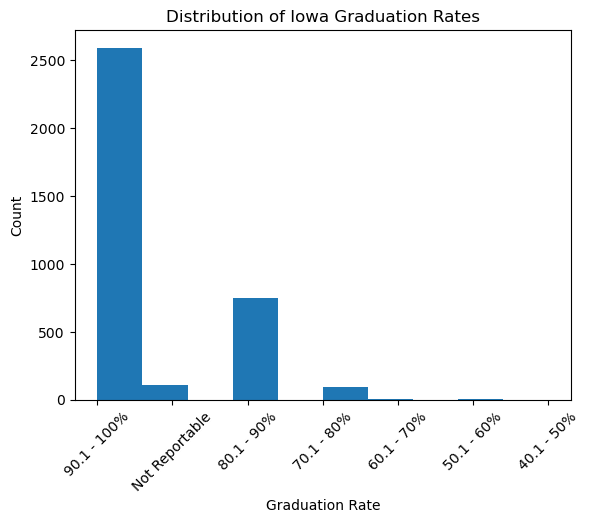

In [51]:
import matplotlib.pyplot as plt

# Create a histogram plot of the graduation rates
plt.hist(iowa_graduation_rate_df['graduation_rate_category'], bins=10)

# Set the x-axis tick labels rotation to 45 degrees
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Graduation Rate')
plt.ylabel('Count')
plt.title('Distribution of Iowa Graduation Rates')

# Display the plot
plt.show()


In [52]:
iowa_graduation_rate_df.isnull().sum()

graduating_class            0
fall_freshman_year          0
district                    0
district_name               0
graduates                   0
total_cohort                0
graduation_rate             0
graduation_rate_category    0
dtype: int64

## 8. Visualization and Analysis

### 8.1. Distribution of Graduation Rates by Category

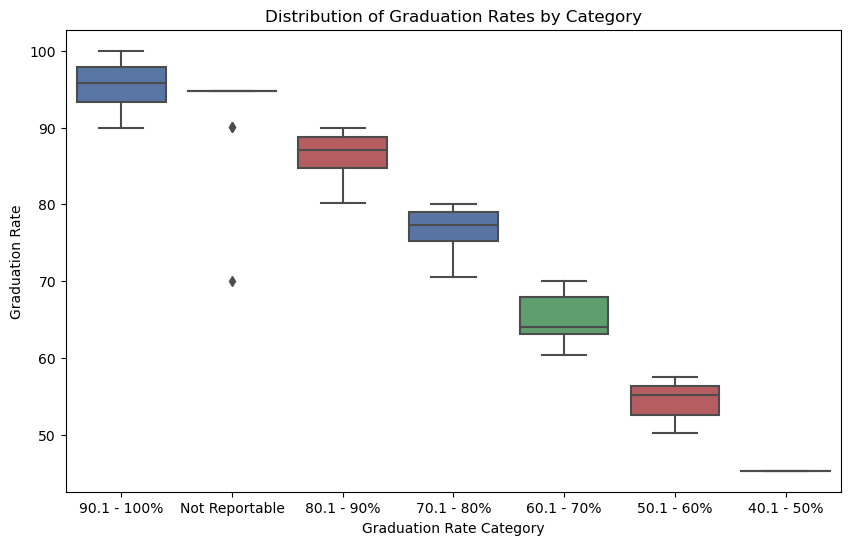

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

iowa_graduation_rate_df['graduation_rate'] = iowa_graduation_rate_df['graduation_rate'].astype(float)
iowa_graduation_rate_df['graduation_rate_category'] = iowa_graduation_rate_df['graduation_rate_category'].astype(str)

# Set figure size
plt.figure(figsize=(10, 6))

# Create box plot with different colors for each category
sns.boxplot(data=iowa_graduation_rate_df, x="graduation_rate_category", y="graduation_rate", palette=["#4c72b0", "#55a868", "#c44e52"])

# Add axis labels and title
plt.xlabel("Graduation Rate Category")
plt.ylabel("Graduation Rate")
plt.title("Distribution of Graduation Rates by Category")

# Show plot
plt.show()


### 8.2. Top 10 Iowa School Districts with the Highest Graduation Rates

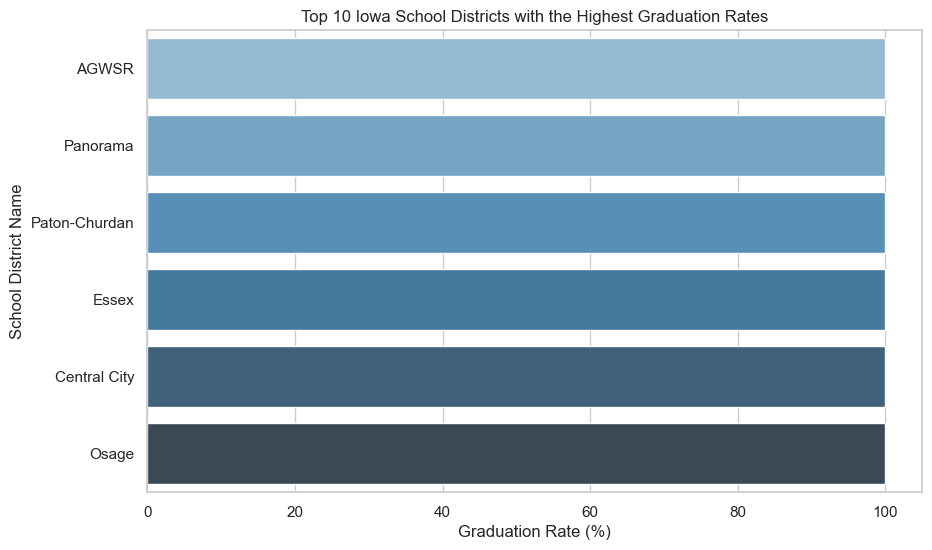

In [54]:
# Sorting the dataframe by graduation_rate in descending order and select the top 10 rows
top10_df = iowa_graduation_rate_df.sort_values("graduation_rate", ascending=False).head(10)

# Create a horizontal bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x="graduation_rate", y="district_name", data=top10_df, palette="Blues_d")
plt.title("Top 10 Iowa School Districts with the Highest Graduation Rates")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("School District Name")
plt.show()


### 8.3. Graduation Rate by District and Year

Text(0.5, 1.0, 'Graduation Rate by District and Year')

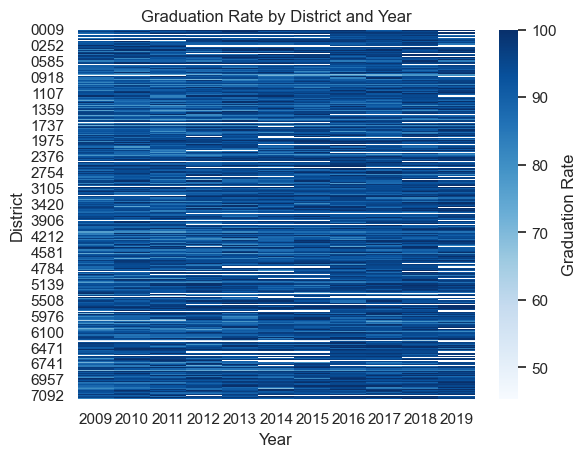

In [55]:
# Pivoting the data create a matrix with districts as rows and years as columns
grad_rate_pivot = iowa_graduation_rate_df.pivot(index='district', columns='graduating_class', values='graduation_rate')

# Create a heatmap plot with a colored bar
sns.heatmap(grad_rate_pivot, cmap='Blues', cbar_kws={'label': 'Graduation Rate'})

# Set axis labels and plot title
plt.xlabel('Year')
plt.ylabel('District')
plt.title('Graduation Rate by District and Year')


### 8.4. Total Cohort vs Fall Freshman Year

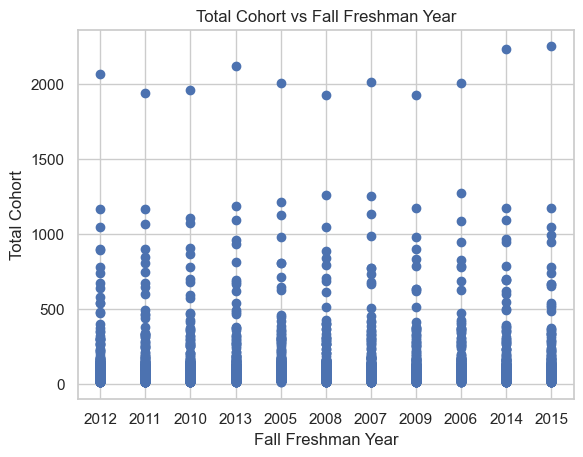

In [56]:
import matplotlib.pyplot as plt

plt.scatter(iowa_graduation_rate_df['fall_freshman_year'], iowa_graduation_rate_df['total_cohort'])
plt.title('Total Cohort vs Fall Freshman Year')
plt.xlabel('Fall Freshman Year')
plt.ylabel('Total Cohort')
plt.show()


### 8.5. Total Cohort vs Fall Freshman Year

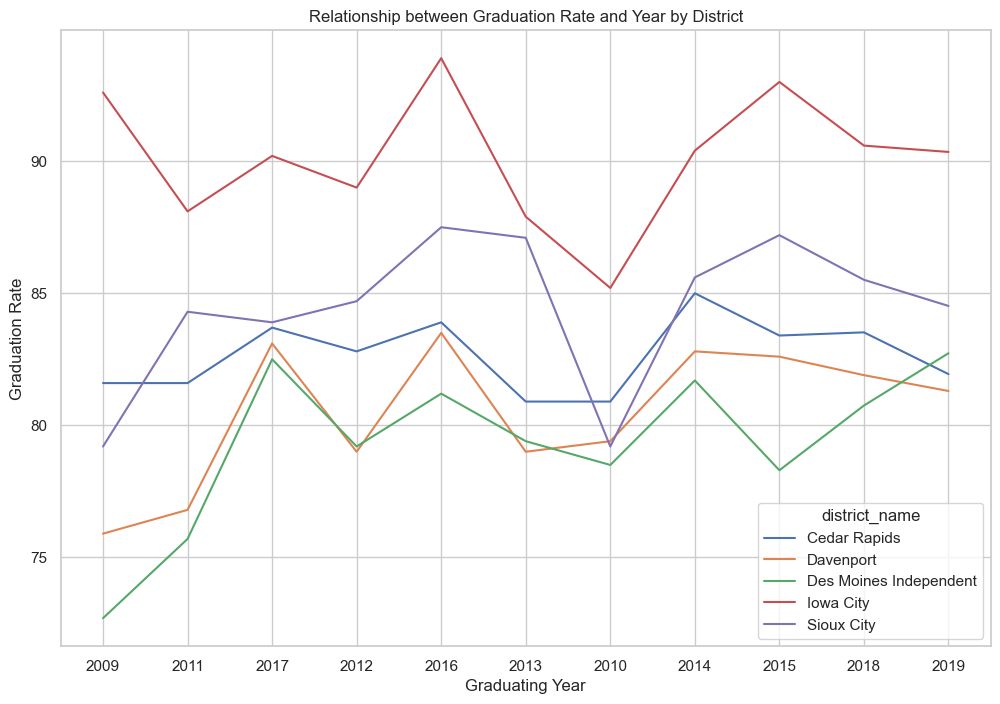

In [57]:
# Filter the dataset to include only the top 5 districts based on the number of graduates
top_districts = iowa_graduation_rate_df.groupby('district_name').sum().sort_values(by='graduates', ascending=False).head(5).reset_index()

# Create the visualization
plt.figure(figsize=(12,8))
sns.lineplot(x='graduating_class', y='graduation_rate', hue='district_name', data=iowa_graduation_rate_df[iowa_graduation_rate_df['district_name'].isin(top_districts['district_name'])])
plt.xlabel('Graduating Year')
plt.ylabel('Graduation Rate')
plt.title('Relationship between Graduation Rate and Year by District')
plt.show()


### 8.6. Graduation Rate by Year and Category

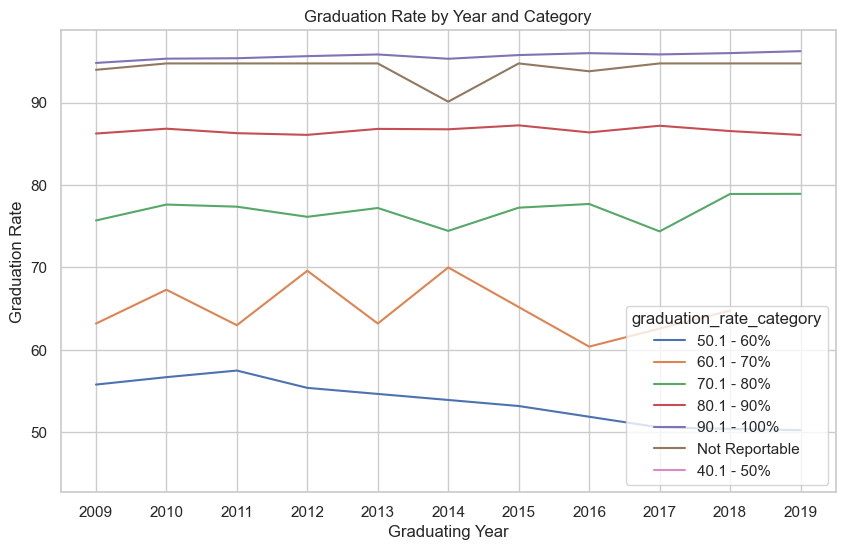

In [58]:
# Grouping the data by year and graduation rate category and calculate the mean graduation rate
yearly_rates = iowa_graduation_rate_df.groupby(['graduating_class', 'graduation_rate_category']).mean()['graduation_rate'].reset_index()

# Ploting the data
plt.figure(figsize=(10,6))
sns.lineplot(x='graduating_class', y='graduation_rate', hue='graduation_rate_category', data=yearly_rates)
plt.xlabel('Graduating Year')
plt.ylabel('Graduation Rate')
plt.title('Graduation Rate by Year and Category')
plt.show()


### 8.7. Graduation Rate count overall

Text(0, 0.5, 'Number of Total Cohorts')

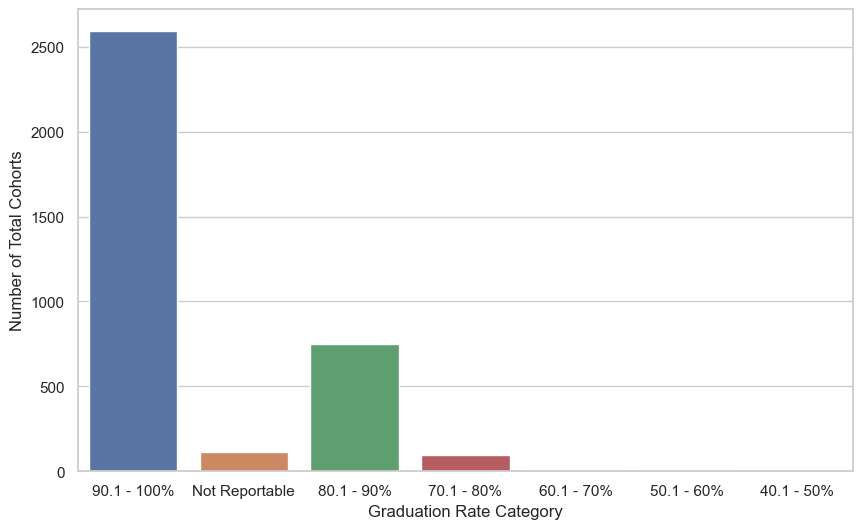

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x='graduation_rate_category', data=iowa_graduation_rate_df)
plt.xlabel('Graduation Rate Category')
plt.ylabel('Number of Total Cohorts')


### 8.8. Total cohorts by graduation rate and graduation rate category

Text(0, 0.5, 'Total Cohort')

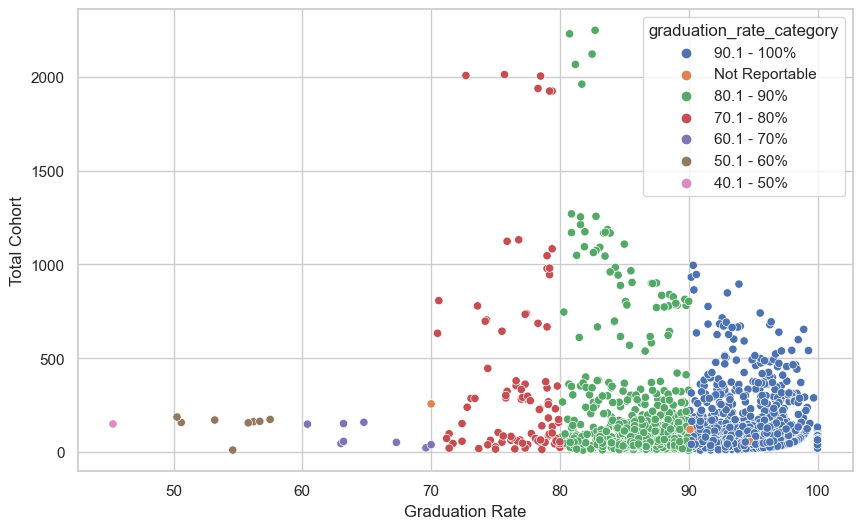

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='graduation_rate', y='total_cohort', hue='graduation_rate_category', data=iowa_graduation_rate_df)
plt.xlabel('Graduation Rate')
plt.ylabel('Total Cohort')


## 9. Storing preprocessed data back to Mongo DB

In [61]:
client = MongoClient(f'mongodb://{USER_NAME}:{USER_PASSWORD}@{HOST}:{PORT}/{DATABASE_NAME}')
db = client[DATABASE_NAME]
iowa_graduation_rate_collection = db['iowa_graduation_rate_preprocessed']
iowa_graduation_rate_collection.drop()
result = iowa_graduation_rate_collection.insert_many(json.loads(iowa_graduation_rate_df.to_json(orient='records')))
client.close()